# API Homework - Financial Planner

In [39]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [40]:
 # Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [41]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc=1.2
my_eth=5.3

In [42]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [47]:
# Requesting the data

request_btc_data= requests.get(btc_url)
btc_data=request_btc_data.json()
import json
print(json.dumps(btc_data, indent=4))

request_eth_data= requests.get(eth_url)
eth_data=request_eth_data.json()
import json
print(json.dumps(eth_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18653712,
            "total_supply": 18653712,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 60339.0,
                    "volume_24h": 54779270350,
                    "market_cap": 1127677327598,
                    "percentage_change_1h": 0.629635492881079,
                    "percentage_change_24h": 0.746217097776608,
                    "percentage_change_7d": 23.0927695861574,
                    "percent_change_1h": 0.629635492881079,
                    "percent_change_24h": 0.746217097776608,
                    "percent_change_7d": 23.0927695861574
                },
                "CAD": {
                    "price": 75284.9703,
                    "volume_24h": 68348095615.695,
                    "

In [49]:
# Fetch current BTC price
# Fetch current ETH price
# Compute current value of my crpto

btc_price=btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value=my_btc*btc_price
eth_price=eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value=my_eth*eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $72406.80
The current value of your 5.3 ETH is $9951.01


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [50]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [51]:
# Set Alpaca API key and secret
# Create the Alpaca API object

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [67]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Format current date as ISO format

today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG

df_portfolio=api.get_barset(tickers,timeframe,start=today,end=today,limit=1000).df
df_portfolio.index=df_portfolio.index.date
df_portfolio.head()



AGG                                       SPY                 \
              open    high      low   close   volume    open    high    low   
2021-03-12  113.88  113.91  113.705  113.79  4339393  392.07  394.21  391.2   

                              
             close    volume  
2021-03-12  394.09  56997361

In [68]:
 # Pick AGG and SPY close prices

agg_close_price=float(df_portfolio["AGG"]["close"])
spy_close_price=float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [69]:
# Compute the current value of shares
my_agg_value=my_agg*agg_close_price
my_spy_value=my_spy*spy_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19704.50
The current value of your 200 AGG shares is $22758.00


### Savings Health Analysis

In [83]:
# Set monthly household income
monthly_income=12000
total_crypto=my_btc_value+my_eth_value
total_stocks=my_agg_value+my_spy_value
data={'$':[crypto,stocks]}

# Create savings DataFrame

df_savings=pd.DataFrame(data, index=['Crypto','Stock Portfolio'])

# Display savings DataFrame
display(df_savings)

,$
Crypto,82357.815
Stock Portfolio,42462.500


<AxesSubplot:title={'center':'Personal Savings Portfolio'}, ylabel='$'>

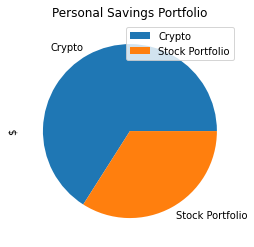

In [84]:
# Plot savings pie chart

df_savings.plot.pie(y="$", title="Personal Savings Portfolio")

In [85]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=total_crypto+total_stocks

# Validate saving health

if total_savings>emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings==emergency_fund:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You are currently ${emergency_fund - total_savings} away from reaching the financial goal")


Congratulations! You have enough money in your emergency fund.


# Part 2 - Retirement Planning

### Monte Carlo Simulation

In [86]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [91]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data=api.get_barset(tickers,timeframe,start=start_date,end=end_date,limit=1000).df
df_stock_data.index=df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0     NaN     NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0  218.33  218.90   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0  218.31  218.75   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0  218.27  218.80   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0  219.25  219.60   

                                        
               low   close      volume  
2016-08-17     NaN     NaN         NaN  
2016-08-18  218.21  218.87  42850145.0  
2016-08-19  217.74  218.57  52238224.0  
2016-08-22  217.83  218.50  48628907.0  
2016-08-23  218.90  218.94  41981207.0

In [92]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30)

# Print the simulation input data
MC_dist.portfolio_data.head()
    
    

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [93]:
 # Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985147,0.999354,1.009697,1.014309,1.005073,1.001601,0.995813,0.995088,0.988457,1.000505,...,0.989574,0.996949,1.005885,0.992867,1.005175,0.997487,0.998085,0.996249,1.005357,0.996893
2,0.986766,1.001493,1.013076,1.031033,1.005126,0.999678,0.989713,0.994598,0.986943,0.984558,...,0.987311,1.006338,1.009031,1.000940,0.995883,0.999655,0.995595,1.003578,1.001889,0.995377
3,0.987359,1.002633,1.021629,1.028063,0.981574,1.005168,0.991998,0.987416,0.990381,0.974313,...,0.992062,0.996696,1.026987,1.008025,1.012057,0.996786,0.999264,1.003197,1.004507,0.999419
4,0.991090,0.996419,1.027783,1.040182,0.991474,1.001393,0.975808,0.982546,0.996283,0.968672,...,0.983866,0.993372,1.024586,1.003401,1.019546,0.998907,1.000180,1.004722,1.007653,1.007169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.903745,13.498137,21.638078,7.234177,10.181155,18.591168,9.560998,2.766385,4.984023,29.546689,...,18.072844,9.948273,2.537748,34.032943,9.561135,3.967691,8.808506,6.045804,13.582286,9.462348
7557,11.031311,13.579033,21.372394,7.215585,10.154360,18.511704,9.619162,2.794653,4.948007,29.649556,...,18.079486,9.966844,2.544764,34.351811,9.462486,3.979973,8.837957,6.077723,13.675173,9.445836
7558,10.866448,13.546778,21.588003,7.175397,10.168944,18.531403,9.624032,2.814486,4.973990,29.944993,...,18.167873,9.884551,2.572148,34.398579,9.511032,3.964357,8.958045,6.137585,13.561728,9.501321
7559,10.773363,13.617502,21.628132,7.171045,10.022488,18.620739,9.714107,2.788632,4.966745,29.922664,...,18.317137,9.921308,2.601169,34.331122,9.616577,3.962727,9.071292,6.108183,13.746324,9.515337


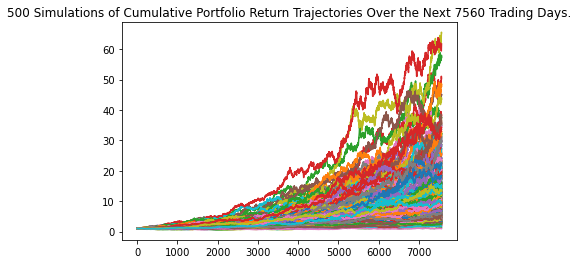

In [94]:
# Plot simulation outcomes


line_plot=MC_dist.plot_simulation()

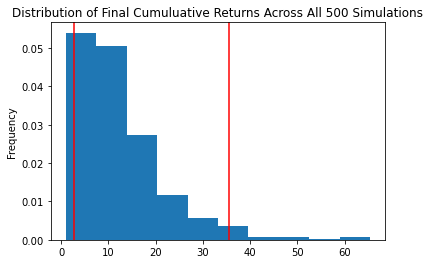

In [95]:
 # Plot probability distribution and confidence intervals

dist_plot=MC_dist.plot_distribution()

### Retirement Analysis

In [97]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl=MC_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean             12.411594
std               9.163685
min               0.981345
25%               6.074804
50%               9.592314
75%              16.165410
max              65.389135
95% CI Lower      2.766324
95% CI Upper     35.423681
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [99]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55326.48 and $708473.61


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [100]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $82989.72 and $1062710.42


## Optional Challenge - Early Retirement

### Five Years Retirement Option

In [112]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5yr_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*5)

# Print the simulation input data
MC_5yr_dist.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [113]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_5yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994975,0.993642,1.005777,1.008930,0.996981,1.006677,0.993703,1.001424,0.993657,1.016081,...,0.989194,0.994824,0.998296,1.007074,0.998484,0.992897,0.998938,1.004014,1.003747,0.988579
2,1.004934,0.996715,1.013228,1.000404,0.989482,1.016034,0.982858,0.996399,0.998010,1.017062,...,0.984768,0.992607,0.999385,1.012434,1.019623,1.003835,1.000370,1.001442,1.008795,0.984306
3,1.005289,0.996898,1.015912,1.004512,1.002314,1.010314,0.997797,0.990228,1.002509,1.014718,...,0.988667,1.000424,0.994864,1.004402,1.019447,1.003605,0.990254,1.006038,1.005675,0.998028
4,1.008955,0.994044,1.012828,1.003002,0.999406,1.020002,1.005987,0.986533,1.023013,1.014669,...,0.999202,1.004506,0.981628,1.011983,1.039181,1.020573,0.995285,1.002286,1.014765,0.997222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.688532,1.137569,1.900570,1.219263,1.489141,1.316890,1.824685,1.099920,1.750655,1.434553,...,1.866100,1.079754,1.793755,1.473412,1.324742,1.248154,1.072948,1.458455,1.292068,2.216477
1257,1.684853,1.140983,1.890232,1.214713,1.519005,1.319759,1.801935,1.114944,1.749698,1.438120,...,1.869768,1.088141,1.781972,1.470362,1.330124,1.227373,1.083564,1.454418,1.291913,2.217765
1258,1.679125,1.138328,1.893074,1.211766,1.527485,1.325337,1.811123,1.128288,1.760423,1.446641,...,1.838536,1.085210,1.778004,1.495932,1.324253,1.228952,1.090758,1.457776,1.296181,2.228636
1259,1.675803,1.129134,1.885363,1.213092,1.545613,1.316270,1.801142,1.112542,1.777138,1.452616,...,1.843695,1.101405,1.777821,1.485846,1.313558,1.225678,1.092111,1.474297,1.297265,2.254669


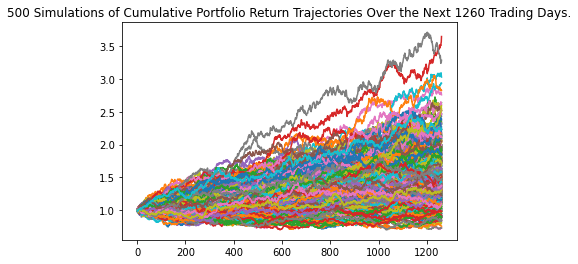

In [118]:
# Plot simulation outcomes

line_plot_5yr=MC_5yr_dist.plot_simulation()

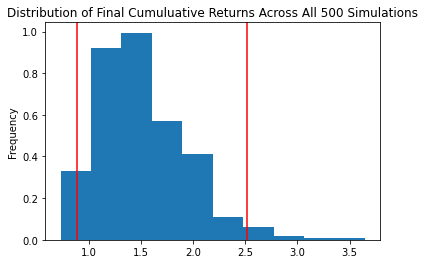

In [119]:
# Plot probability distribution and confidence intervals
dist_plot_5yr=MC_5yr_dist.plot_distribution()

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_5yr=MC_5yr_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl_5yr)

count           500.000000
mean              1.515804
std               0.420661
min               0.729310
25%               1.202924
50%               1.463185
75%               1.771427
max               3.645788
95% CI Lower      0.891336
95% CI Upper      2.514951
Name: 1260, dtype: float64


In [121]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower_five=round(tbl_5yr[8]*initial_investment,2)
ci_upper_five=round(tbl_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53480.16 and $150897.03


### Ten Years Retirement Option

In [106]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*10)

# Print the simulation input data
MC_10yr_dist.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2016-08-17  112.45  112.6600  112.3600  112.580  3136737.0          NaN   
2016-08-18  112.64  112.7799  112.5350  112.705  1814107.0     0.001110   
2016-08-19  112.53  112.6200  112.3900  112.490  2961016.0    -0.001908   
2016-08-22  112.66  112.7380  112.5600  112.650  1647564.0     0.001422   
2016-08-23  112.78  112.8250  112.6301  112.690  2197732.0     0.000355   

               SPY                                                   
              open    high     low   close      volume daily_return  
2016-08-17     NaN     NaN     NaN     NaN         NaN          NaN  
2016-08-18  218.33  218.90  218.21  218.87  42850145.0          NaN  
2016-08-19  218.31  218.75  217.74  218.57  52238224.0    -0.001371  
2016-08-22  218.27  218.80  217.83  218.50  48628907.0    -0.000320  
2016-08-23  219.25  219.60  218.90  218.94  41981207.0     0.002014

In [107]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992679,1.000340,1.016344,0.984314,0.993970,1.009070,0.995320,0.995586,1.008582,0.994480,...,1.011444,1.004212,0.994678,0.999017,1.006528,0.996075,1.010110,1.005209,1.004282,1.000853
2,0.985888,1.006316,1.021968,0.982571,0.993643,1.022420,0.999491,0.999844,1.002994,0.995142,...,1.011646,1.010067,0.999224,1.005091,0.990845,0.988469,1.007362,1.006263,1.009325,1.003254
3,0.988321,1.011413,1.015286,0.985129,0.998023,1.022213,1.005181,1.007441,1.011883,0.998516,...,1.006300,1.007107,1.000860,1.016072,0.991619,0.979603,1.011351,1.006798,1.008511,0.999287
4,0.988772,1.017180,1.015629,0.980492,1.004768,1.031468,0.987481,1.005775,1.008854,0.999535,...,0.997184,1.010458,1.007274,1.009726,0.995362,0.974096,1.023581,1.006460,1.003522,0.993031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.161942,2.835078,2.300180,1.982200,1.467137,3.425194,2.201152,3.209978,3.441071,1.876290,...,3.844485,2.213637,2.449696,3.606984,2.226581,4.335293,2.539843,1.022739,1.902574,1.155461
2517,2.170931,2.878153,2.283449,1.978376,1.446613,3.400689,2.168509,3.226455,3.419962,1.857745,...,3.876971,2.190521,2.461558,3.562860,2.221198,4.298876,2.546569,1.035164,1.902045,1.154074
2518,2.180833,2.895984,2.291671,1.953803,1.449939,3.454919,2.140003,3.221840,3.457727,1.858180,...,3.879597,2.160333,2.443685,3.591918,2.224911,4.307016,2.565677,1.044753,1.888632,1.156992
2519,2.188373,2.866905,2.316770,1.951142,1.454954,3.475600,2.169335,3.182755,3.474529,1.841458,...,3.893966,2.157632,2.440778,3.599631,2.231568,4.283355,2.565211,1.045268,1.897324,1.143006


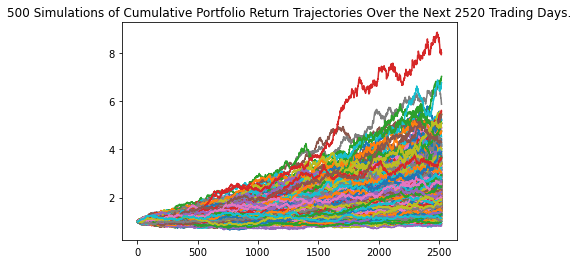

In [122]:
# Plot simulation outcomes
line_plot_10yr=MC_10yr_dist.plot_simulation()

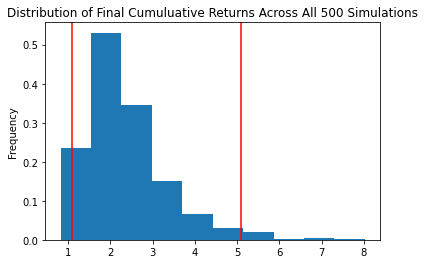

In [123]:
# Plot probability distribution and confidence intervals
dist_plot_10yr=MC_10yr_dist.plot_distribution()

In [124]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr=MC_10yr_dist.summarize_cumulative_return()

# Print summary statistics

print(tbl_10yr)

count           500.000000
mean              2.379371
std               0.999047
min               0.823083
25%               1.720338
50%               2.162213
75%               2.812689
max               8.023474
95% CI Lower      1.088829
95% CI Upper      5.088859
Name: 2520, dtype: float64


In [125]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten=round(tbl_10yr[8]*initial_investment,2)
ci_upper_ten=round(tbl_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65329.77 and $305331.52
